<a href="https://colab.research.google.com/github/IngridDirckx/Datafiles-eindopdracht/blob/main/Eindopdracht_vraag_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
#importeren datafile
df = pd.read_csv('https://raw.githubusercontent.com/IngridDirckx/Datafiles-eindopdracht/main/levelized-cost-of-energy.csv', sep=",")

In [ ]:
# Kolomnamen DataFrame
print("First few rows of the DataFrame:")
df.head()



First few rows of the DataFrame:


,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
0,Argentina,ARG,2012,NaN,NaN,NaN,NaN,NaN,NaN,0.117167
1,Argentina,ARG,2013,NaN,NaN,NaN,NaN,NaN,NaN,0.118271
2,Argentina,ARG,2014,NaN,NaN,NaN,NaN,NaN,NaN,0.103164
3,Argentina,ARG,2015,NaN,NaN,NaN,NaN,NaN,NaN,0.098663
4,Argentina,ARG,2017,NaN,NaN,NaN,NaN,NaN,NaN,0.103911


In [ ]:
#bewerkingen aan de kolommen
#kolomnamen wijzigen
df1 = df.rename(columns={'Bioenergy levelized cost of energy': 'Bioenergy', 'Geothermal levelized cost of energy': 'Geothermal', 'Offshore wind levelized cost of energy': 'Offshore wind', \
                        'Solar photovoltaic levelized cost of energy': 'Solar photo', 'Concentrated solar power levelized cost of energy': 'Concentr solar',\
                        'Hydropower levelized cost of energy': 'Hydropower', 'Onshore wind levelized cost of energy': 'Onshore wind', 'Entity':'Country'})
#verwijderen kolom code
df_col = df1.drop(columns=['Code'])
df_col

,Country,Year,Bioenergy,Geothermal,Offshore wind,Solar photo,Concentr solar,Hydropower,Onshore wind
0,Argentina,2012,NaN,NaN,NaN,NaN,NaN,NaN,0.117167
1,Argentina,2013,NaN,NaN,NaN,NaN,NaN,NaN,0.118271
2,Argentina,2014,NaN,NaN,NaN,NaN,NaN,NaN,0.103164
3,Argentina,2015,NaN,NaN,NaN,NaN,NaN,NaN,0.098663
4,Argentina,2017,NaN,NaN,NaN,NaN,NaN,NaN,0.103911
...,...,...,...,...,...,...,...,...,...
704,World,1995,NaN,NaN,NaN,NaN,NaN,NaN,0.219476
705,World,1996,NaN,NaN,NaN,NaN,NaN,NaN,0.196082
706,World,1997,NaN,NaN,NaN,NaN,NaN,NaN,0.171793
707,World,1998,NaN,NaN,NaN,NaN,NaN,NaN,0.160972


In [ ]:
# Bewerkingen om de overbodige rijen te filteren
#filteren op de rijen zodat alleen data van 'world' overblijft
df_world = df_col[df_col['Country'] == 'World']
#controle
print(df_world.head())

    Country  Year  Bioenergy  Geothermal  Offshore wind  Solar photo  \
670   World  2010   0.082115    0.052968       0.197266        0.445   
671   World  2011   0.078753         NaN       0.206095        0.332   
672   World  2012   0.067661    0.088407       0.174729        0.248   
673   World  2013   0.086412    0.064723       0.148688        0.191   
674   World  2014   0.086581    0.066333       0.181632        0.172   

     Concentr solar  Hydropower  Onshore wind  
670        0.380490    0.041607      0.107237  
671        0.368422    0.039122      0.101918  
672        0.357044    0.040702      0.093280  
673        0.282368    0.045491      0.093891  
674        0.247807    0.045431      0.084304  


In [ ]:
#blok om inhoud van dataframe te bekijken
#controleren ontbrekende data
print("\nNumber of missing values in each column:")
print(df_world.isnull().sum())



Number of missing values in each column:
Country            0
Year               0
Bioenergy         26
Geothermal        24
Offshore wind     16
Solar photo       26
Concentr solar    26
Hydropower        26
Onshore wind       0
dtype: int64


In [ ]:
#alle oude jaren verwijderen omdat deze (muv on shore wind) veel null waarden hebben
df_world_act = df_world[df_world['Year'] > 2010]
#controleren of deze interventie het aantal nulwaarden acceptabel maakt
print("\nNumber of missing values in each column:")
print(df_world_act.isnull().sum())



Number of missing values in each column:
Country           0
Year              0
Bioenergy         0
Geothermal        1
Offshore wind     0
Solar photo       0
Concentr solar    0
Hydropower        0
Onshore wind      0
dtype: int64


In [ ]:
#analyse van de nulwaarde
# de nulwaarde in kolom Geothermal invullen op basis van gemiddelde
gemiddelde = df_world_act['Geothermal'].mean()
df_world_act['Geothermal'].fillna(gemiddelde, inplace=True)

#controle of de nulwaarde is vervangen
print(df_world_act.isnull().sum())

Country           0
Year              0
Bioenergy         0
Geothermal        0
Offshore wind     0
Solar photo       0
Concentr solar    0
Hydropower        0
Onshore wind      0
dtype: int64


<ipython-input-19-d09ba4ccb442>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_world_act['Geothermal'].fillna(gemiddelde, inplace=True)


In [ ]:
#dataframe geschikt maken voor een grafische weergave. Daarom eerst een copy maken van het dataframe
#copy
df_world_fc = df_world_act.copy()
#kolom 'world' verwijderen
df_world_fc.drop(columns=['Country'], inplace=True )
print(df_world_fc)

     Year  Bioenergy  Geothermal  Offshore wind  Solar photo  Concentr solar  \
671  2011   0.078753    0.069416       0.206095        0.332        0.368422   
672  2012   0.067661    0.088407       0.174729        0.248        0.357044   
673  2013   0.086412    0.064723       0.148688        0.191        0.282368   
674  2014   0.086581    0.066333       0.181632        0.172        0.247807   
675  2015   0.076327    0.061978       0.148289        0.129        0.238052   
676  2016   0.074623    0.071487       0.122831        0.113        0.280949   
677  2017   0.074508    0.074787       0.112199        0.089        0.268972   
678  2018   0.057697    0.068872       0.105692        0.075        0.158322   
679  2019   0.067484    0.071406       0.091183        0.066        0.233778   
680  2020   0.076009    0.060013       0.088097        0.059        0.118275   
681  2021   0.070519    0.071727       0.078844        0.051        0.120690   
682  2022   0.061469    0.063849       0

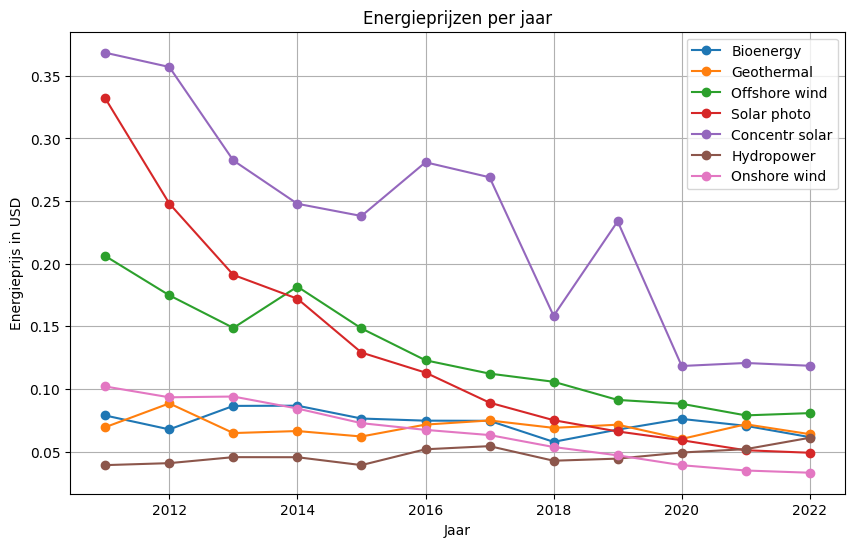

In [ ]:
#lijngrafiek maken van df_world_fc
# Lijst van energiebronnen voor de y-as
energiebronnen = ['Bioenergy', 'Geothermal', 'Offshore wind', 'Solar photo', 'Concentr solar', 'Hydropower', 'Onshore wind']

# Plot de gegevens
plt.figure(figsize=(10, 6))
for bron in energiebronnen:
    plt.plot(df_world_fc['Year'], df_world_fc[bron], marker='o', label=bron)

plt.title('Energieprijzen per jaar')
plt.xlabel('Jaar')
plt.ylabel('Energieprijs in USD')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Voorspellen toekomstige prijs. Selecteer de relevante kolommen voor extrapolatie, met uitsluiting van Country en Year
kolommen_voor_extrapolatie = df_world_fc.columns.difference(['Country', 'Year'])

# Lege dictionary om extrapolatie op te slaan
extrapolated_data = {'Year': [], 'Bioenergy': [], 'Geothermal': [], 'Offshore wind': [],
                    'Solar photo': [], 'Concentr solar': [], 'Hydropower': [], 'Onshore wind': []}

# Nieuw jaar
jaar = 2026

# Voeg het jaar toe aan de 'Year'-sleutel van extrapolated_data
extrapolated_data['Year'].append(jaar)

# Extrapolatie per kolom
for kolom in kolommen_voor_extrapolatie:
    # Fit een lineaire regressie aan de bestaande gegevens
    coefficients = np.polyfit(df_world_fc['Year'], df_world_fc[kolom], 1)

    # Extrapoleren naar het nieuwe jaar
    extrapoleerde_waarde = round(np.polyval(coefficients, jaar), 3)

    # Voeg de geëxtrapoleerde waarde toe aan de juiste kolom in extrapolated_data
    extrapolated_data[kolom].append(extrapoleerde_waarde)

# nieuw df van extrapolated_data
df_world_forecast = pd.DataFrame(extrapolated_data)

# Print het extrapolated_df DataFrame om de resultaten te bekijken
df_world_forecast


,Year,Bioenergy,Geothermal,Offshore wind,Solar photo,Concentr solar,Hydropower,Onshore wind
0,2026,0.06,0.063,0.02,-0.086,0.022,0.06,0.002


   Bioenergy  Geothermal  Offshore wind  Solar photo  Concentr solar  \
0       0.06       0.063           0.02       -0.086           0.022   

   Hydropower  Onshore wind  
0        0.06         0.002  


<Figure size 1000x600 with 0 Axes>

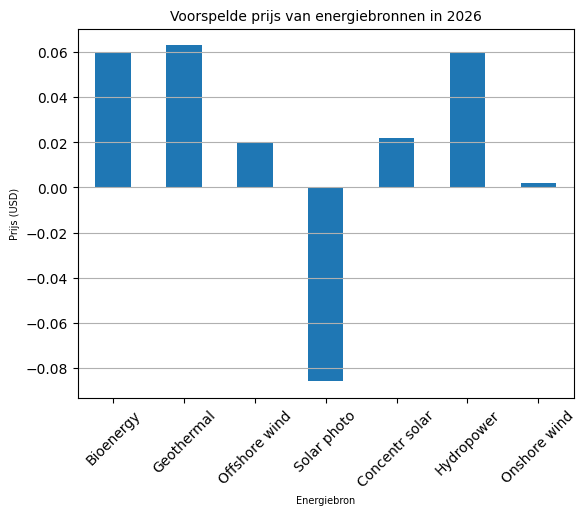

In [ ]:
# grafiek met de voorspelde prijzen maken
# verwijder kolom Year
df_2026 = df_world_forecast.drop(columns=['Year'])
print(df_2026)
#energiebron op de x as
df_2026=df_2026.transpose()
# Plot het staafdiagram
plt.figure(figsize=(10, 6))
df_2026.plot(kind='bar', legend=None)
plt.title('Voorspelde prijs van energiebronnen in 2026', fontsize=10)
plt.xlabel('Energiebron', fontsize=7)
plt.ylabel('Prijs (USD)', fontsize=7)
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()
